<a href="https://colab.research.google.com/github/Harshita-Puthran/factverse/blob/main/factverse_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_parquet("hf://datasets/NickyNicky/global-news-dataset/data/train-00000-of-00001.parquet")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
print(df.head(100))

    article_id source_id                   source_name  \
0        89541      None  International Business Times   
1        89542      None                    Prtimes.jp   
2        89543      None                      VOA News   
3        89545      None            The Indian Express   
4        89547      None           The Times of Israel   
..         ...       ...                           ...   
95       89702      None                        Forbes   
96       89704      None                     Aajtak.in   
97       89707      None                     The Punch   
98       89710      None                 TheJournal.ie   
99       89714      None                           NPR   

                                               author  \
0                                      Paavan MATHEMA   
1                                                None   
2          webdesk@voanews.com (Agence France-Presse)   
3                                           Editorial   
4                 

In [4]:
df.shape

(105375, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


In [6]:
df.isnull().sum()

,0
article_id,0
source_id,80880
source_name,0
author,8219
title,40
description,383
url,0
url_to_image,5624
published_at,0
content,0


In [7]:
df['source_name'].value_counts().head(10)


,count
source_name,
ETF Daily News,16631
The Times of India,7629
GlobeNewswire,5485
Forbes,4423
Biztoc.com,3968
BBC News,3342
Globalsecurity.org,3093
Business Insider,2746
ABC News,2188


<Axes: xlabel='published_at'>

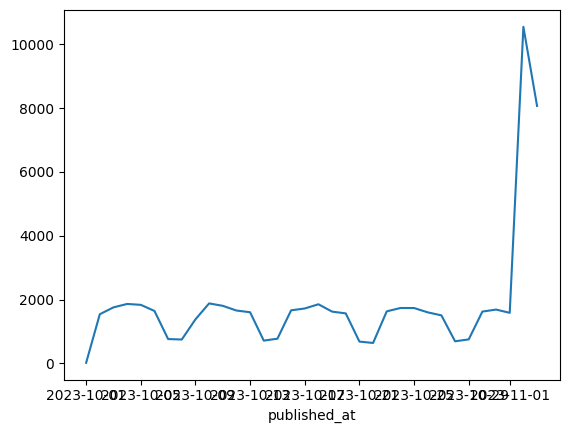

In [8]:

df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df['published_at'].dt.date.value_counts().sort_index().plot(kind='line')